## Overview

Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

With this context, EDSA is challenging you during the Classification Sprint with the task of creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.

Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.



<br></br>

<div align="center" style="width: 600px; font-size: 80%; text-align: center; margin: 0 auto">
<img src="C:/Users/Mpilenhle\Documents/EDSA/Classification/classification-predict-streamlit-model/resources/imgs/worl.jpg"

     alt="Some fine wine for your fine model"
     style="float: center; padding-bottom=0.5em"
     width=600px/>
Some fine wine for your fine modeling process. 
Photo by <a href="https://unsplash.com/@hermez777?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText"> Hermes Rivera</a> on Unsplash
</div>

The structure of this notebook is as follows:

 - First, we'll load our data to get a view of the predictor and response variables we will be modeling. 
 - We'll then preprocess our data, binarising the target variable and splitting up the data intro train and test sets. 
 - We then model our data using a Support Vector Classifier.
 - Following this modeling, we define a custom metric as the log-loss in order to evaluate our produced model.
 - Using this metric, we then take several steps to improve our base model's performance by optimising the hyperparameters of the SVC through a grid search strategy. 

In [ ]:
image = Image.open("C:/Users/Mpilenhle\Documents/EDSA/Classification/classification-predict-streamlit-model/resources/imgs/worl.jpg")


In [1]:
# import relevant libraries
import nltk
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
pd.set_option('display.max_rows', 100)
from sklearn.utils import resample
from sklearn.pipeline import Pipeline


from nltk.corpus import stopwords
from sklearn.metrics import classification_report

# set plot style
# Style
import matplotlib.style as style 
sns.set(font_scale=1.5)
style.use('seaborn-pastel')
style.use('seaborn-poster')
from PIL import Image
from wordcloud import WordCloud


In [33]:
# Loading Data
df_train = pd.read_csv('C:/Users/Mpilenhle/Documents/EDSA/Classification/Advanced_Classification_Predict-student_data-2780/train.csv')
df_test = pd.read_csv('C:/Users/Mpilenhle/Documents/EDSA/Classification/Advanced_Classification_Predict-student_data-2780/test_with_no_labels.csv')

## The Dataset 

For this coding challenge we'll be using the [Wine Quality dataset](https://archive.ics.uci.edu/ml/datasets/wine+quality) from the UCI Machine Learning Repository. The constituents of this dataset are red and white variants of the Portuguese "Vinho Verde" wine. 

This dataset consists of the following variables: 

 - sentiments
 - message
 - tweetid



In [31]:
# looking at the data
df_train.shape

(15819, 3)

In [34]:
df_train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [36]:
df = df_train.copy()
df.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [98]:
hasht = [i if i.startswith('#') else np.nan for i in df_train['message'] ]
df['hashtags'] = hasht

In [137]:
df.tail(15)

,sentiment,message,tweetid,Retweets,hashtags
15804,1,RT @cathdweeb: me with full knowledge of globa...,386076,RT @cathdweeb: me with full knowledge of globa...,NaN
15805,2,RT @GrindTV: New head of EPA says climate chan...,830383,RT @GrindTV: New head of EPA says climate chan...,NaN
15806,-1,RT @HerberMp: @sness5561_ness Al Gore is a idi...,213863,RT @HerberMp: @sness5561_ness Al Gore is a idi...,NaN
15807,1,#scottpruit climate change comments would be l...,447067,NaN,#scottpruit climate change comments would be l...
15808,0,RT @ThePowersThatBe: Now if she could only be ...,127777,RT @ThePowersThatBe: Now if she could only be ...,NaN
15809,2,The quest to capture and store carbon — and sl...,705048,NaN,NaN
15810,0,This global warming so late in the season is p...,572819,NaN,NaN
15811,1,RT @StephenSchlegel: she's thinking about how ...,426353,RT @StephenSchlegel: she's thinking about how ...,NaN
15812,1,RT @SierraClub: 2016: hottest year in history....,989478,RT @SierraClub: 2016: hottest year in history....,NaN
15813,1,RT @thinkprogress: EPA head falsely claims car...,442853,RT @thinkprogress: EPA head falsely claims car...,NaN


In [138]:
df.to_csv('hash_retweets', index=True)

In [134]:
tt = df[['sentiment' ,'hashtags']]
tt.shape

(15819, 2)

In [147]:
t1 = tt[tt['sentiment'] == 1]

#remmoving the mentions 
pattern_url = r'\d'
subs_url = r''
t1['hashtags'] = t1['hashtags'].replace(to_replace = pattern_url, value = subs_url, regex = True)

#remmoving the mentions 
pattern_url = r'http[s]://[A-Za-z./]+'
subs_url = r''
t1['hashtags'] = t1['hashtags'].replace(to_replace = pattern_url, value = subs_url, regex = True)


t1.to_csv('df_Pro_hashtags.csv', index=False)

In [144]:
t0 = tt[tt['sentiment'] == 0]

#remmoving the mentions 
pattern_url = r'\d'
subs_url = r''
t0['hashtags'] = t0['hashtags'].replace(to_replace = pattern_url, value = subs_url, regex = True)

#remmoving the mentions 
pattern_url = r'http[s]://[A-Za-z./]+'
subs_url = r''
t0['hashtags'] = t0['hashtags'].replace(to_replace = pattern_url, value = subs_url, regex = True)

t0.to_csv('df_Neutral_hashtags.csv', index=False)

In [146]:
t2 = tt[tt['sentiment'] == 2]

#remmoving the mentions 
pattern_url = r'\d'
subs_url = r''
t2['hashtags'] = t2['hashtags'].replace(to_replace = pattern_url, value = subs_url, regex = True)

#remmoving the mentions 
pattern_url = r'http[s]://[A-Za-z./]+'
subs_url = r''
t2['hashtags'] = t2['hashtags'].replace(to_replace = pattern_url, value = subs_url, regex = True)


t2.to_csv('df_News_hashtags.csv', index=False)

In [185]:
t_neg = tt[tt['sentiment'] == -1]

#remmoving the mentions 
pattern_url = r'\d'
subs_url = r''
t_neg['hashtags'] = t_neg['hashtags'].replace(to_replace = pattern_url, value = subs_url, regex = True)

#remmoving the mentions 
pattern_url = r'http[s]://[A-Za-z./]+'
subs_url = r''
t_neg['hashtags'] = t_neg['hashtags'].replace(to_replace = pattern_url, value = subs_url, regex = True)

t_neg.to_csv('df_anti_hashtags.csv', index=False)

In [107]:
hash_pro = " ".join([review for review in t1.hashtags if review is not np.nan])
hash_neutral = " ".join(review for review in t0.hashtags if review is not np.nan)
hash_news = " ".join(review for review in t2.hashtags if review is not np.nan)
hash_anti = " ".join(review for review in t_neg.hashtags if review is not np.nan)



(-0.5, 399.5, 199.5, -0.5)

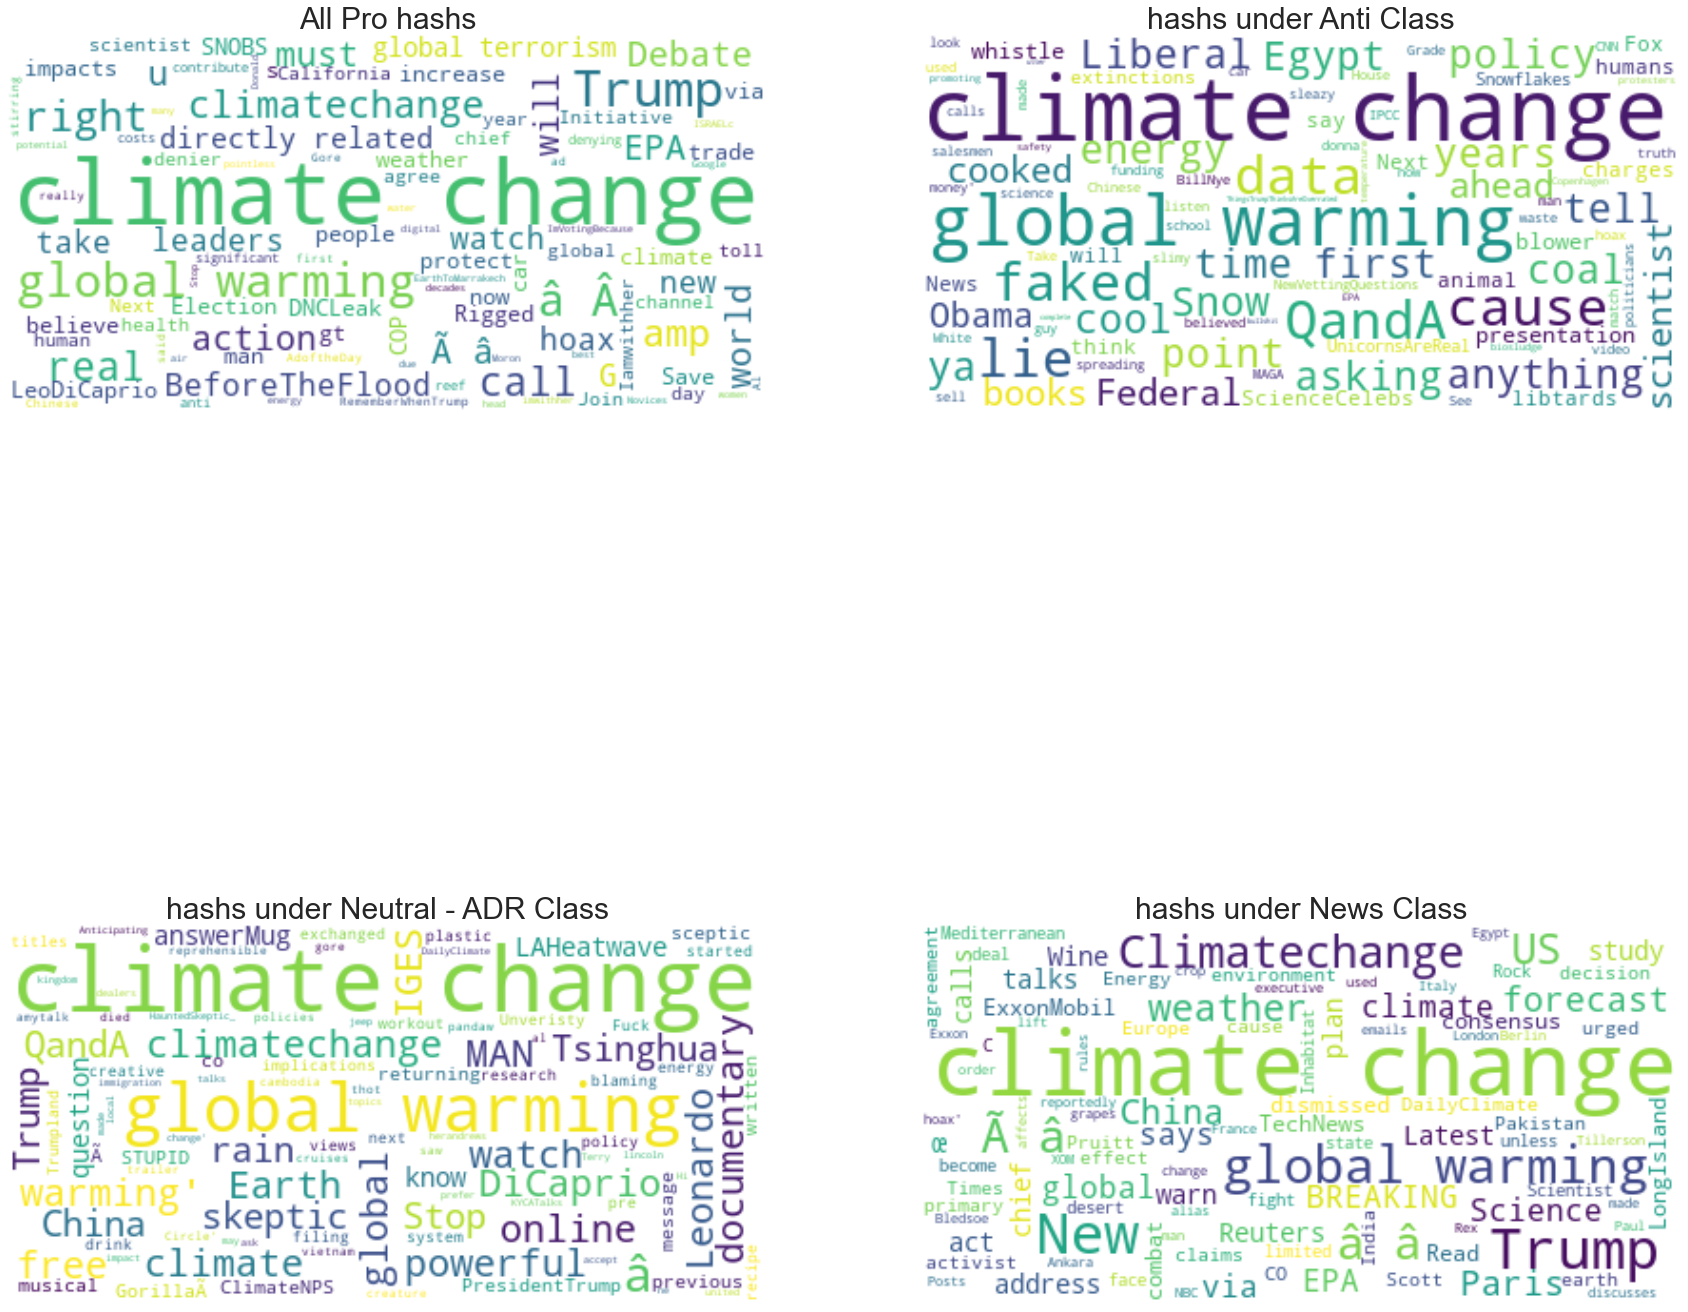

In [253]:


fig, ax = plt.subplots(2, 2, figsize  = (30,30))

# Create and generate a word cloud image:
wordcloud_pro = WordCloud(max_font_size=50, max_words=100,
                        background_color="white").generate(hash_pro)
wordcloud_neutral = WordCloud(max_font_size=50, max_words=100
                            , background_color="white").generate(hash_neutral)
wordcloud_news = WordCloud(max_font_size=50, max_words=100,
                        background_color="white").generate(hash_news)
wordcloud_anti = WordCloud(max_font_size=50, max_words=100,
                        background_color="white").generate(hash_anti)

# Display the generated image:
ax[0][0].imshow(wordcloud_pro, interpolation='bilinear')
ax[0][0].set_title('All Pro hashs', fontsize=30)
ax[0][0].axis('off')
ax[0][1].imshow(wordcloud_anti, interpolation='bilinear')
ax[0][1].set_title('hashs under Anti Class',fontsize=30)
ax[0][1].axis('off')
ax[1][0].imshow(wordcloud_neutral, interpolation='bilinear')
ax[1][0].set_title('hashs under Neutral - ADR Class',fontsize=30)
ax[1][0].axis('off')
ax[1][1].imshow(wordcloud_news, interpolation='bilinear')
ax[1][1].set_title('hashs under News Class',fontsize=30)
ax[1][1].axis('off')


In [51]:
dd = df[['sentiment' ,'Retweets']]
dd.head()

,sentiment,Retweets
0,1,NaN
1,1,NaN
2,2,RT @RawStory: Researchers say we have three ye...
3,1,NaN
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ..."


In [148]:
x1 = dd[dd['sentiment'] == 1]

#remmoving the mentions 
pattern_url = r'\d'
subs_url = r''
x1['Retweets'] = x1['Retweets'].replace(to_replace = pattern_url, value = subs_url, regex = True)

#remmoving the mentions 
pattern_url = r'http[s]://[A-Za-z./]+'
subs_url = r''
x1['Retweets'] = x1['Retweets'].replace(to_replace = pattern_url, value = subs_url, regex = True)


x1.to_csv('df_Pro_retweets.csv', index=False)

In [123]:
len(x1)

8530

In [149]:
x2 = dd[dd['sentiment'] == 2]

#remmoving the mentions 
pattern_url = r'\d'
subs_url = r''
x2['Retweets'] = x2['Retweets'].replace(to_replace = pattern_url, value = subs_url, regex = True)

#remmoving the mentions 
pattern_url = r'http[s]://[A-Za-z./]+'
subs_url = r''
x2['Retweets'] = x2['Retweets'].replace(to_replace = pattern_url, value = subs_url, regex = True)


x2.to_csv('df_News_retweets.csv', index=False)

In [121]:
len(x2)

3640

In [150]:
x0 = dd[dd['sentiment'] == 0]

#remmoving the mentions 
pattern_url = r'\d'
subs_url = r''
x0['Retweets'] = x0['Retweets'].replace(to_replace = pattern_url, value = subs_url, regex = True)

#remmoving the mentions 
pattern_url = r'http[s]://[A-Za-z./]+'
subs_url = r''
x0['Retweets'] = x0['Retweets'].replace(to_replace = pattern_url, value = subs_url, regex = True)


x0.to_csv('df_Neutral_retweets.csv', index=False)

In [120]:
len(x0)

2353

In [151]:
x_neg = dd[dd['sentiment'] == -1]

#remmoving the mentions 
pattern_url = r'\d'
subs_url = r''
x_neg['Retweets'] = x_neg['Retweets'].replace(to_replace = pattern_url, value = subs_url, regex = True)

#remmoving the mentions 
pattern_url = r'http[s]://[A-Za-z./]+'
subs_url = r''
x_neg['Retweets'] = x_neg['Retweets'].replace(to_replace = pattern_url, value = subs_url, regex = True)


x_neg.to_csv('df_Anti_retweets.csv', index=False)

In [196]:
x_neg["Retweets"].value_counts()

RT @realDonaldTrump: The concept of global warming was created by and for the Chinese in order to make U.S. manufacturing non-competitive.              22
RT @realDonaldTrump: It's freezing outside, where the hell is 'global warming'??                                                                        14
RT @CounterMoonbat: The people who predicted parts of Manhattan would be underwater by  due to climate change are concerned about 'fakeÃ¢â‚¬Â¦          12
RT @PrisonPlanet: A bunch of Oxford elitists want to tax the food of poor people because 'climate change'. How about fuck off instead? httpÃ¢â‚¬Â¦       9
RT @Cernovich: Same 'experts' who said Hillary would win claim 'climate change' is real. LOL! Go away, morons, you know nothing and you losÃ¢â‚¬Â¦       5
                                                                                                                                                        ..
RT @markconway: CO is not a driver of global warming &amp; the globe i

In [ ]:
final.to_csv(final_name, index=False)


In [95]:
tweet_pro = " ".join([review for review in x1.Retweets if review is not np.nan])
tweet_neutral = " ".join(review for review in x0.Retweets if review is not np.nan)
tweet_news = " ".join(review for review in x2.Retweets if review is not np.nan)
tweet_anti = " ".join(review for review in x_neg.Retweets if review is not np.nan)

(-0.5, 399.5, 199.5, -0.5)

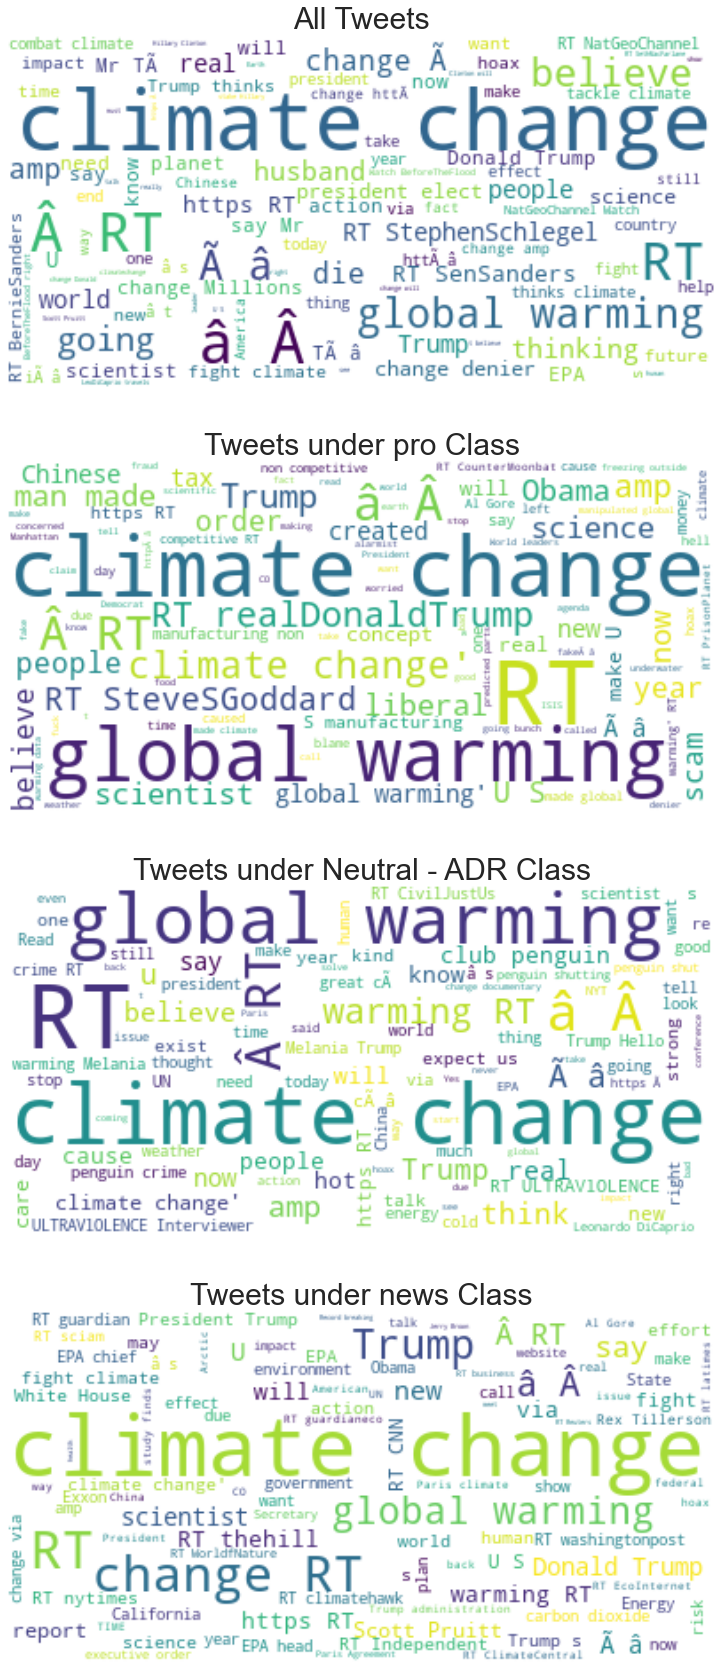

In [97]:
fig, ax = plt.subplots(4, 1, figsize  = (30,30))

# Create and generate a word cloud image:
wordcloud_pro = WordCloud(max_font_size=50, max_words=100,
                        background_color="white").generate(tweet_pro)
wordcloud_neutral = WordCloud(max_font_size=50, max_words=100
                            , background_color="white").generate(tweet_neutral)
wordcloud_news = WordCloud(max_font_size=50, max_words=100,
                        background_color="white").generate(tweet_news)
wordcloud_anti = WordCloud(max_font_size=50, max_words=100,
                        background_color="white").generate(tweet_anti)

# Display the generated image:
ax[0].imshow(wordcloud_pro, interpolation='bilinear')
ax[0].set_title('All Tweets', fontsize=30)
ax[0].axis('off')
ax[1].imshow(wordcloud_anti, interpolation='bilinear')
ax[1].set_title('Tweets under pro Class',fontsize=30)
ax[1].axis('off')
ax[2].imshow(wordcloud_neutral, interpolation='bilinear')
ax[2].set_title('Tweets under Neutral - ADR Class',fontsize=30)
ax[2].axis('off')
ax[3].imshow(wordcloud_news, interpolation='bilinear')
ax[3].set_title('Tweets under news Class',fontsize=30)
ax[3].axis('off')


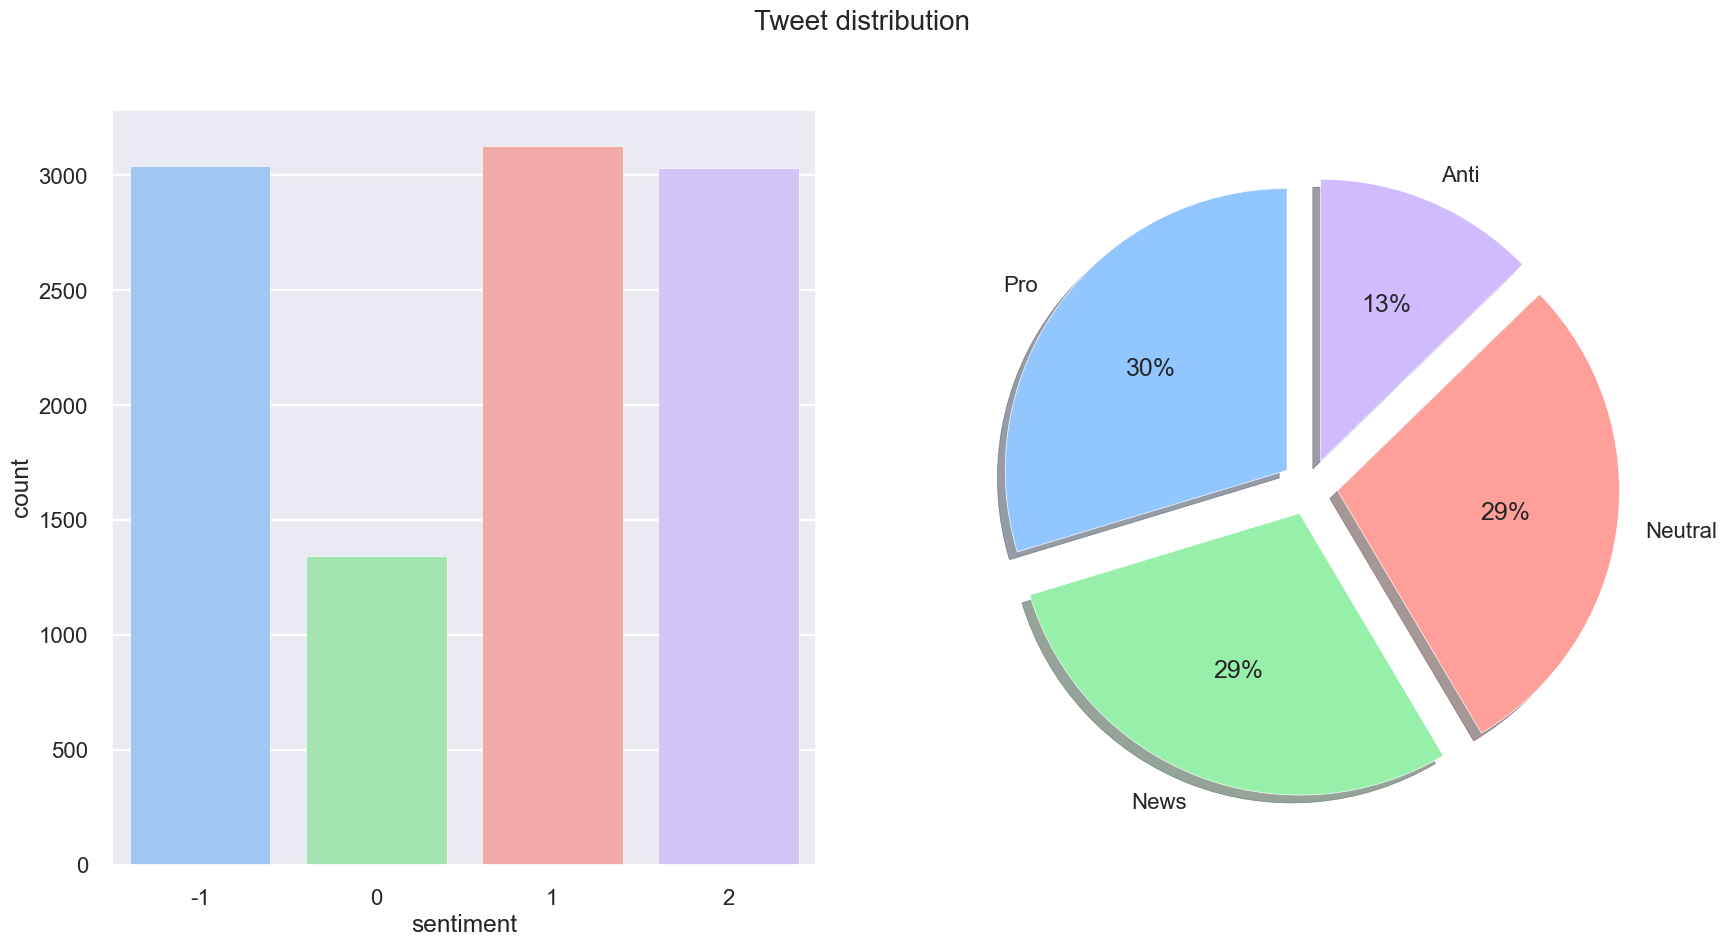

In [72]:
# Display target distribution
style.use('seaborn-pastel')
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(20, 10),dpi=100)
sns.countplot(df['sentiment'], ax=axes[0])
labels=['Pro', 'News', 'Neutral', 'Anti'] 
axes[1].pie(df['sentiment'].value_counts(),labels=labels,autopct='%1.0f%%',shadow=True,startangle=90,explode = (0.1, 0.1, 0.1, 0.1))
fig.suptitle('Tweet distribution', fontsize=20)
plt.show()

In [156]:

"""
The function uses some of the functions remove_emoji() which removes
emojis in a tweet
it also uses the function remove_punctuation() which removes
punctuations

The function data_cleaner() implements both these functions to make a 
clean data frame, with the use of the regular expressions it removes
noise or unwanted charecters in the tweets


"""
import string
import re


#creating a function for removing emojis
def remove_emoji(string):
    emoji_pattern = re.compile("[" 
                u"\U0001F600-\U0001F64F"  # emoticons
                u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                u"\U0001F680-\U0001F6FF"  # transport & map symbols
                u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                u"\U00002702-\U000027B0"
                u"\U000024C2-\U0001F251"
                u"\U0001f926-\U0001f937"
                u'\U00010000-\U0010ffff'
                u"\u200d"
                u"\u2640-\u2642"
                u"\u2600-\u2B55"
                u"\u23cf"
                u"\u23e9"
                u"\u231a"
                u"\u3030"
                u"\ufe0f"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)


# punctuation remover function
def remove_punctuation(tweets):
    return ''.join([l for l in tweets if l not in string.punctuation])



def data_cleaner(df, column):
    
    #remmoving the urls
    pattern_url = r'http[s]?://[A-Za-z0-9/.]+'
    subs_url = r'url-web'
    df[column] = df[column].replace(to_replace = pattern_url, value = subs_url, regex = True)
    
    #remmoving the Re Tweets 
    pattern_url = r'RT\s\@'
    subs_url = r''
    df[column] = df[column].replace(to_replace = pattern_url, value = subs_url, regex = True)
    

    #remmoving the mentions 
    pattern_url = r'@'
    subs_url = r''
    df[column] = df[column].replace(to_replace = pattern_url, value = subs_url, regex = True)


    #remmoving the Hashtags 
    pattern_url = r'\#'
    subs_url = r''
    df[column] = df[column].replace(to_replace = pattern_url, value = subs_url, regex = True)
    

    #remmoving the remaining https
    pattern_url = r'https:[.*?]+'
    subs_url = r''
    df[column] = df[column].replace(to_replace = pattern_url, value = subs_url, regex = True)

    # turning all tweets to lower case
    df[column] = df[column].str.lower()
    
    # using apply method to remove the punctuation marks
    df[column] = df[column].apply(remove_punctuation)
    
    # Removing the emojis using the apply method
    df[column] = df[column].apply(remove_emoji)
    
    #remmoving the uknown charecters from words
    pattern_url = r'[^A-Za-z ]'
    subs_url = r''
    df[column] = df[column].replace(to_replace = pattern_url, value = subs_url, regex = True)

    
    return df

In [164]:
clean_df = data_cleaner(df_train, 'message')

In [197]:
df.head(15)

,sentiment,message,tweetid,tokens,token_no_stop_word,lemma,stem,clean_sentences
0,1,polyscimajor epa chief doesnt think carbon dio...,625221,"[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb...",polyscimajor epa chief doesnt think carbon dio...
1,1,its not like we lack evidence of anthropogenic...,126103,"[its, not, like, we, lack, evidence, of, anthr...","[like, lack, evidence, anthropogenic, global, ...","[like, lack, evidence, anthropogenic, global, ...","[like, lack, evid, anthropogen, global, warm]",like lack evid anthropogen global warm
2,2,rawstory researchers say we have three years t...,698562,"[rawstory, researchers, say, we, have, three, ...","[rawstory, researchers, say, three, years, act...","[rawstory, researcher, say, three, year, act, ...","[rawstori, research, say, three, year, act, cl...",rawstori research say three year act climat ch...
3,1,todayinmaker wired was a pivotal year in the...,573736,"[todayinmaker, wired, was, a, pivotal, year, i...","[todayinmaker, wired, pivotal, year, war, clim...","[todayinmaker, wired, pivotal, year, war, clim...","[todayinmak, wire, pivot, year, war, climat, c...",todayinmak wire pivot year war climat chang ur...
4,1,soynoviodetodas its and a racist sexist clima...,466954,"[soynoviodetodas, its, and, a, racist, sexist,...","[soynoviodetodas, racist, sexist, climate, cha...","[soynoviodetodas, racist, sexist, climate, cha...","[soynoviodetoda, racist, sexist, climat, chang...",soynoviodetoda racist sexist climat chang deni...
5,1,worth a read whether you do or dont believe in...,425577,"[worth, a, read, whether, you, do, or, dont, b...","[worth, read, whether, dont, believe, climate,...","[worth, read, whether, dont, believe, climate,...","[worth, read, whether, dont, believ, climat, c...",worth read whether dont believ climat chang ur...
6,1,thenation mike pence doesnt believe in global ...,294933,"[thenation, mike, pence, doesnt, believe, in, ...","[thenation, mike, pence, doesnt, believe, glob...","[thenation, mike, penny, doesnt, believe, glob...","[thenat, mike, penni, doesnt, believ, global, ...",thenat mike penni doesnt believ global warm sm...
7,1,makeandmendlife six big things we can all do t...,992717,"[makeandmendlife, six, big, things, we, can, a...","[makeandmendlife, six, big, things, today, fig...","[makeandmendlife, six, big, thing, today, figh...","[makeandmendlif, six, big, thing, today, fight...",makeandmendlif six big thing today fight clima...
8,1,aceofspadeshq my yo nephew is inconsolable he ...,664510,"[aceofspadeshq, my, yo, nephew, is, inconsolab...","[aceofspadeshq, yo, nephew, inconsolable, want...","[aceofspadeshq, yo, nephew, inconsolable, want...","[aceofspadeshq, yo, nephew, inconsol, want, di...",aceofspadeshq yo nephew inconsol want die old ...
9,1,paigetweedy no offense but like how do you jus...,260471,"[paigetweedy, no, offense, but, like, how, do,...","[paigetweedy, offense, like, believe, global, ...","[paigetweedy, offense, like, believe, global, ...","[paigetweedi, offens, like, believ, global, warm]",paigetweedi offens like believ global warm


In [160]:

"""

Pre processing the data by creating new columns each with feature
normalization technique applied, the use of outer functions also help
in cleaning and removing the stop words
first tokenise tweets
then remove stop words
we then lemmatize the tokens
we then stem the words
we finally join the tokens to form a sentence


"""

# importing tokenizing library
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer
#importing stemmer library
from nltk import SnowballStemmer
#importing stemmer library
from nltk import SnowballStemmer



# lemmatizing function
lemmatizer = WordNetLemmatizer()
def tweet_lemma(words, lemmatizer):
    return [lemmatizer.lemmatize(word) for word in words if word.isalpha()]    

#Stemmer function
stemmer = SnowballStemmer('english')
def token_stemmer(words, stemmer):
    return [stemmer.stem(word) for word in words]

def remove_stop_words(tokens):    
    return [t for t in tokens if t not in stopwords.words('english')]

def token_lemmatizer_stemmer(df):
    
    #tokenise the tweets and create a column
    tokeniser = TreebankWordTokenizer()
    df['tokens'] = df['message'].apply(tokeniser.tokenize)
     # Remove stop words first
    df['token_no_stop_word'] = df['tokens'].apply(remove_stop_words)
    
    # Remove stop words first
    df['lemma'] = df['token_no_stop_word'].apply(tweet_lemma, args=(lemmatizer, ))
    
    # Remove stop words first
    df['stem'] = df['lemma'].apply(token_stemmer, args=(stemmer, ))
    
    # join the tokens to form a sentence
    clean_sentences = [" ".join(i) for i in df['stem']]
    df['clean_sentences'] = clean_sentences
    
    return df
    

In [165]:
df = token_lemmatizer_stemmer(clean_df)
df.head()

,sentiment,message,tweetid,tokens,token_no_stop_word,lemma,stem,clean_sentences
0,1,polyscimajor epa chief doesnt think carbon dio...,625221,"[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb...",polyscimajor epa chief doesnt think carbon dio...
1,1,its not like we lack evidence of anthropogenic...,126103,"[its, not, like, we, lack, evidence, of, anthr...","[like, lack, evidence, anthropogenic, global, ...","[like, lack, evidence, anthropogenic, global, ...","[like, lack, evid, anthropogen, global, warm]",like lack evid anthropogen global warm
2,2,rawstory researchers say we have three years t...,698562,"[rawstory, researchers, say, we, have, three, ...","[rawstory, researchers, say, three, years, act...","[rawstory, researcher, say, three, year, act, ...","[rawstori, research, say, three, year, act, cl...",rawstori research say three year act climat ch...
3,1,todayinmaker wired was a pivotal year in the...,573736,"[todayinmaker, wired, was, a, pivotal, year, i...","[todayinmaker, wired, pivotal, year, war, clim...","[todayinmaker, wired, pivotal, year, war, clim...","[todayinmak, wire, pivot, year, war, climat, c...",todayinmak wire pivot year war climat chang ur...
4,1,soynoviodetodas its and a racist sexist clima...,466954,"[soynoviodetodas, its, and, a, racist, sexist,...","[soynoviodetodas, racist, sexist, climate, cha...","[soynoviodetodas, racist, sexist, climate, cha...","[soynoviodetoda, racist, sexist, climat, chang...",soynoviodetoda racist sexist climat chang deni...


In [166]:
def bag_of_words_count(words, word_dict={}):
    """ this function takes in a list of words and returns a dictionary 
        with each word as a key, and the value represents the number of 
        times that word appeared"""
    for word in words:
        if word in word_dict.keys():
            word_dict[word] += 1
        else:
            word_dict[word] = 1
    return word_dict

In [167]:
type_labels = df.sentiment.unique()
type_labels

array([ 1,  2,  0, -1], dtype=int64)

In [168]:
beliver = {}
for pp in type_labels:
    df_label = df.groupby('sentiment')
    beliver[pp] = {}
    for row in df_label.get_group(pp)['token_no_stop_word']:
        beliver[pp] = bag_of_words_count(row, beliver[pp])

In [169]:
all_words = set()
for pp in type_labels:
    for word in beliver[pp]:
        all_words.add(word)

In [170]:
beliver['all'] = {}
for pp in type_labels:    
    for word in all_words:
        if word in beliver[pp].keys():
            if word in beliver['all']:
                beliver['all'][word] += beliver[pp][word]
            else:
                beliver['all'][word] = beliver[pp][word]

In [171]:
df_token = pd.DataFrame(beliver, columns = [1, 2, 0, -1, 'all'])

In [172]:
df_token = df_token.fillna(0)

In [176]:
df_token['perc_1'] = (df_token[1] / df_token['all']) * 100
df_token['perc_0'] = (df_token[0] / df_token['all']) * 100
df_token['perc_2'] = (df_token[2] / df_token['all']) * 100
df_token['perc_-1'] = (df_token[-1] / df_token['all']) * 100

In [187]:
df_token.to_csv('df_token_ind.csv', index=True)

In [183]:
df_token.sort_values(1, ascending = False).head()

,1,2,0,-1,all,perc_1,perc_0,perc_2,perc_-1
climate,7349.0,3348.0,1442.0,796.0,12935,56.814843,11.148048,25.883262,6.153846
change,7077.0,3206.0,1375.0,735.0,12393,57.104817,11.094973,25.869442,5.930767
urlweb,4027.0,3946.0,833.0,509.0,9315,43.231347,8.942566,42.361782,5.464305
global,1595.0,508.0,1037.0,635.0,3775,42.251656,27.470199,13.456954,16.821192
warming,1430.0,436.0,967.0,604.0,3437,41.606052,28.135001,12.685482,17.573465


In [180]:
inds = [i for i in df_token.index if len(i) <= 2]
inds[0:5]

['h', 'yo', 'oh', 'na', 'wi']

In [ ]:
def plot_target_based_features(feature):
    
    # create data frames for classes
    x1 = df_train[df_train['sentiment'] == 1][feature]
    x2 = df_train[df_train['sentiment'] == 2][feature]
    x0 = df_train[df_train['sentiment'] == 0][feature]
    x_neg = df_train[df_train['sentiment'] == -1][feature]
    plt.figure(1, figsize = (16, 8))
    plt.subplots(1,1,'all')
    plt.xlabel('number of charecters in a tweet')
    plt.ylabel('number of tweets')
    
    _ = plt.hist(x1, alpha = 0.5, color = 'grey', bins = 50, label = 'belivers')
    _ = plt.hist(x2, alpha = 0.5, color = 'blue', bins = 50, label = 'news')
    _ = plt.hist(x0, alpha = 0.6, color = 'green', bins = 50, label = 'neutral')
    _ = plt.hist(x_neg, alpha = 0.5, color = 'orange', bins = 50, label = 'anti')
    plt.legend(["belivers", 'news', 'neutral', 'anti'])
    
    return _
    



import matplotlib.pyplot as plt
plt.pie(x, labels)
plt.show()

In [ ]:
_ = plt.hist([v for v in df_token['all'] if v < 10],bins=10)
plt.ylabel("number of words")
plt.xlabel("word frequency")

In [201]:
# Pick a class size of roughly half the size of the largest size
class_size = 1000

# Downsample classes with more than 5000 observations
pro_downsampled = resample(df[df['sentiment']==1],
                          replace=False, # sample without replacement (no need to duplicate observations)
                          n_samples= 3000, # match number in class_size
                          random_state=27) # reproducible results

# Upsample classes with less than 5000 observations
neutral_upsampled = resample(df[df['sentiment']==0],
                          replace=True, # sample with replacement (we need to duplicate observations)
                          n_samples=class_size, # match number in class_size
                          random_state=27) # reproducible results

# Upsample classes with less than 5000 observations
anti_upsampled = resample(df[df['sentiment']==-1],
                          replace=True, # sample with replacement (we need to duplicate observations)
                          n_samples=class_size, # match number in class_size
                          random_state=27) # reproducible results

# Upsample classes with less than 5000 observations
news_upsampled = resample(df[df['sentiment']==2],
                          replace=True, # sample with replacement (we need to duplicate observations)
                          n_samples=class_size, # match number in class_size
                          random_state=27) # reproducible results





In [202]:
# Combine sampled classes with majority class
sampled = pd.concat([pro_downsampled, neutral_upsampled, anti_upsampled, news_upsampled])

# Check new class counts
sampled['sentiment'].value_counts()


 1    3000
 0    1000
-1    1000
 2    1000
Name: sentiment, dtype: int64

In [203]:
sampled.shape

(6000, 8)

In [205]:
# importing necessary libraries
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
 
# X -> features, y -> label
y =  sampled['sentiment']
X =  sampled['message']

# dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                random_state = 42)

# extracting features
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
V_train_X = vectorizer.fit_transform(X_train)
V_test_X = vectorizer.transform(X_test)


# Import the scaler module
from sklearn import preprocessing
scaler = preprocessing.MaxAbsScaler ()
# Scale data
X_train_scaled = scaler.fit_transform(V_train_X)
x_test_scaled = scaler.transform(V_test_X)

In [238]:
from sklearn.cluster import KMeans

NUMBER_OF_CLUSTERS = 4
km = KMeans(
    n_clusters=NUMBER_OF_CLUSTERS, 
    init='k-means++', 
    max_iter=500)
km.fit(V_train_X)

KMeans(max_iter=500, n_clusters=4)

In [245]:
from sklearn.decomposition import PCA

# First: for every document we get its corresponding cluster
clusters = km.predict(V_train_X)

# We train the PCA on the dense version of the tf-idf. 
pca = PCA(n_components=2)

two_dim = pca.fit_transform(V_train_X.todense())

scatter_x = two_dim[:, 0] # first principle component
scatter_y = two_dim[:, 1] # second principle component

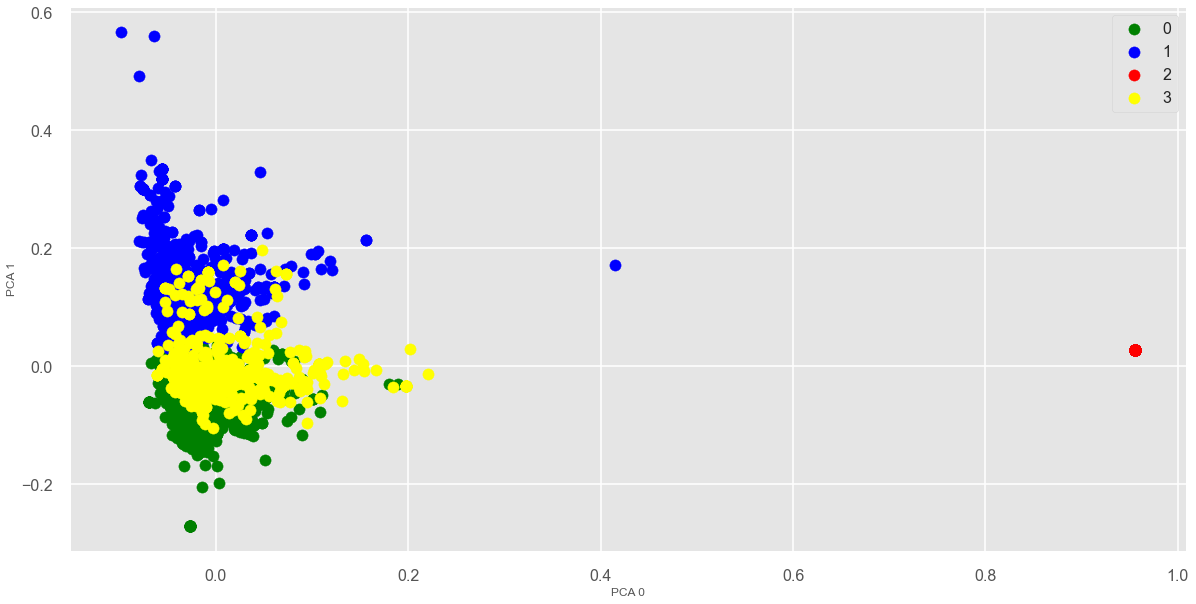

In [247]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

fig, ax = plt.subplots()
fig.set_size_inches(20,10)

# color map for NUMBER_OF_CLUSTERS we have
cmap = {0: 'green', 1: 'blue', 2: 'red', 3:'yellow'}

# group by clusters and scatter plot every cluster
# with a colour and a label
for group in np.unique(clusters):
    ix = np.where(clusters == group)
    ax.scatter(scatter_x[ix], scatter_y[ix], c=cmap[group], label=group)

ax.legend()
plt.xlabel("PCA 0")
plt.ylabel("PCA 1")
plt.show()

In [249]:
order_centroids = km.cluster_centers_.argsort()[:, ::-1]

terms = vectorizer.get_feature_names()
for i in range(4):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

# Cluster 0: com edu medical yeast know cancer does doctor subject lines
# Cluster 1: edu game games team baseball com year don pitcher writes
# Cluster 2: edu car com subject organization lines university writes article

Cluster 0: climate change urlweb the to of is on and trump
Cluster 1: warming global the is urlweb to and of in for
Cluster 2: shes stephenschlegel husband thinking die because going your doesnt believe
Cluster 3: you we to climate change have in believe the do


Accuracy (train) for L1 logistic: 50.1% 
Accuracy (train) for L2 logistic (Multinomial): 49.7% 
Accuracy (train) for L2 logistic (OvR): 49.3% 
Accuracy (train) for Linear SVC: 49.6% 


KeyboardInterrupt: 

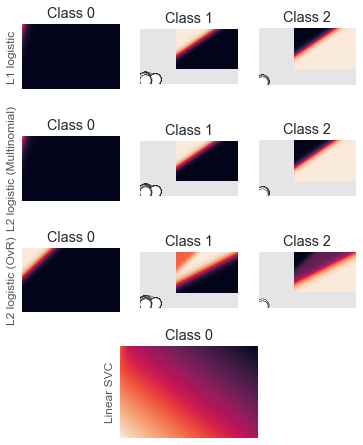

In [255]:
# Author: Alexandre Gramfort <alexandre.gramfort@inria.fr>
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn import datasets

iris = datasets.load_iris()
X = two_dim.reshape(4500, 2)  # we only take the first two features for visualization
y = y_train

n_features = X.shape[1]

C = 10
kernel = 1.0 * RBF([1.0, 1.0])  # for GPC

# Create different classifiers.
classifiers = {
    "L1 logistic": LogisticRegression(
        C=C, penalty="l1", solver="saga",
        multi_class="multinomial", max_iter=10000
    ),
    "L2 logistic (Multinomial)": LogisticRegression(
        C=C, penalty="l2", solver="saga",
        multi_class="multinomial", max_iter=10000
    ),
    "L2 logistic (OvR)": LogisticRegression(
        C=C, penalty="l2", solver="saga",
        multi_class="ovr", max_iter=10000
    ),
    "Linear SVC": SVC(kernel="linear",
        C=C, probability=True, random_state=0),
    "GPC": GaussianProcessClassifier(kernel),
}

n_classifiers = len(classifiers)

plt.figure(figsize=(3 * 2, n_classifiers * 2))
plt.subplots_adjust(bottom=0.2, top=0.95)

xx = np.linspace(3, 9, 100)
yy = np.linspace(1, 5, 100).T
xx, yy = np.meshgrid(xx, yy)
Xfull = np.c_[xx.ravel(), yy.ravel()]

for index, (name, classifier) in enumerate(classifiers.items()):
    classifier.fit(X, y)

    y_pred = classifier.predict(X)
    accuracy = accuracy_score(y, y_pred)
    print("Accuracy (train) for %s: %0.1f%% " % (name, accuracy * 100))

    # View probabilities:
    probas = classifier.predict_proba(Xfull)
    n_classes = np.unique(y_pred).size
    for k in range(n_classes):
        plt.subplot(n_classifiers, n_classes, index * n_classes + k + 1)
        plt.title("Class %d" % k)
        if k == 0:
            plt.ylabel(name)
        imshow_handle = plt.imshow(
            probas[:, k].reshape((100, 100)), extent=(3, 9, 1, 5), origin="lower"
        )
        plt.xticks(())
        plt.yticks(())
        idx = y_pred == k
        if idx.any():
            plt.scatter(X[idx, 0], X[idx, 1], marker="o", c="w", edgecolor="k")

ax = plt.axes([0.15, 0.04, 0.7, 0.05])
plt.title("Probability")
plt.colorbar(imshow_handle, cax=ax, orientation="horizontal")

plt.show()

In [204]:
df['sentiment'].value_counts()


 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

In [254]:
sampled.head()

,sentiment,message,tweetid,tokens,token_no_stop_word,lemma,stem,clean_sentences
11729,1,ubcforestry funding from genomebc will support...,977844,"[ubcforestry, funding, from, genomebc, will, s...","[ubcforestry, funding, genomebc, support, sall...","[ubcforestry, funding, genomebc, support, sall...","[ubcforestri, fund, genomebc, support, sallyna...",ubcforestri fund genomebc support sallynaitken...
8308,1,yadimoiina gag orders sure hes definitely gree...,441956,"[yadimoiina, gag, orders, sure, hes, definitel...","[yadimoiina, gag, orders, sure, hes, definitel...","[yadimoiina, gag, order, sure, he, definitely,...","[yadimoiina, gag, order, sure, he, definit, gr...",yadimoiina gag order sure he definit green doe...
7159,1,pattonoswalt not ominous at all he also wants ...,978938,"[pattonoswalt, not, ominous, at, all, he, also...","[pattonoswalt, ominous, also, wants, names, an...","[pattonoswalt, ominous, also, want, name, anyo...","[pattonoswalt, omin, also, want, name, anyon, ...",pattonoswalt omin also want name anyon work cl...
5644,1,melissajpeltier in case you forgot about that ...,587737,"[melissajpeltier, in, case, you, forgot, about...","[melissajpeltier, case, forgot, chinese, hoax,...","[melissajpeltier, case, forgot, chinese, hoax,...","[melissajpelti, case, forgot, chines, hoax, gl...",melissajpelti case forgot chines hoax global w...
6732,1,sethmacfarlane hrc proposes installing half a ...,804767,"[sethmacfarlane, hrc, proposes, installing, ha...","[sethmacfarlane, hrc, proposes, installing, ha...","[sethmacfarlane, hrc, proposes, installing, ha...","[sethmacfarlan, hrc, propos, instal, half, bil...",sethmacfarlan hrc propos instal half billion s...


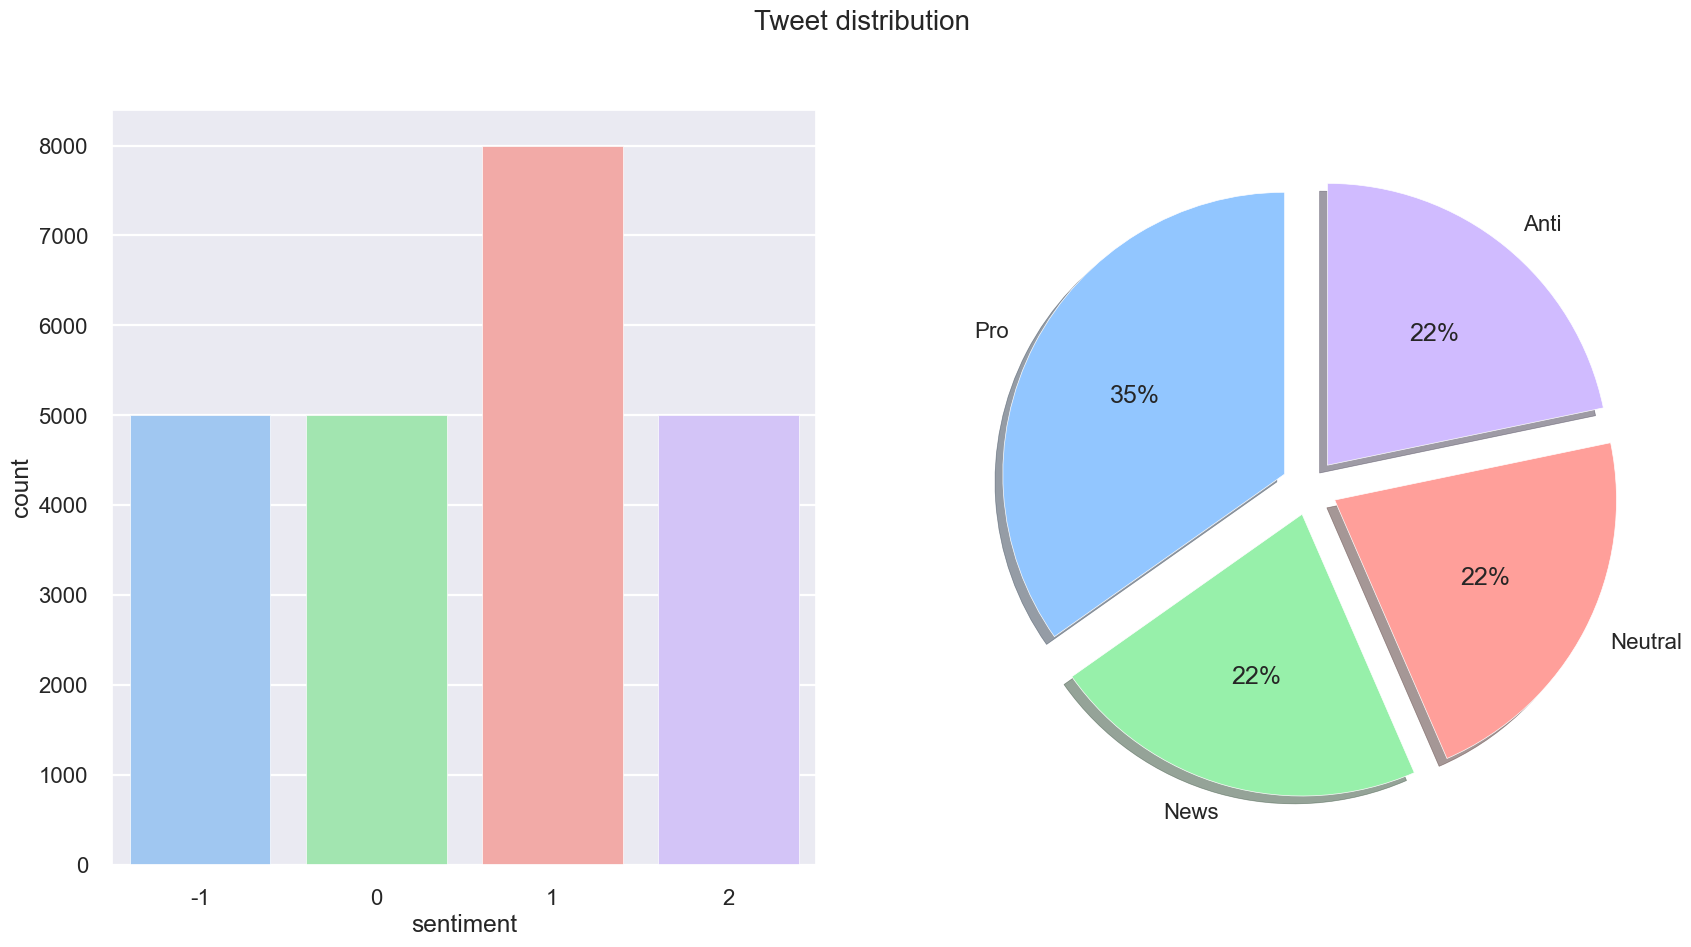

In [73]:
# Display target distribution
style.use('seaborn-pastel')
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(20, 10),dpi=100)
sns.countplot(sampled['sentiment'], ax=axes[0])
labels=['Pro', 'News', 'Neutral', 'Anti'] 
axes[1].pie(sampled['sentiment'].value_counts(),labels=labels,autopct='%1.0f%%',shadow=True,startangle=90,explode = (0.1, 0.1, 0.1, 0.1))
fig.suptitle('Tweet distribution', fontsize=20)
plt.show()

In [15]:
# importing necessary libraries
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
 
# X -> features, y -> label
y =  df_train['sentiment']
X =  df_train['message']

# dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                random_state = 42)

# extracting features
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
V_train_X = vectorizer.fit_transform(X_train)
V_test_X = vectorizer.transform(X_test)


# Import the scaler module
from sklearn import preprocessing
scaler = preprocessing.MaxAbsScaler ()
# Scale data
X_train_scaled = scaler.fit_transform(V_train_X)
x_test_scaled = scaler.transform(V_test_X)


In [33]:

 # training a DescisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train_scaled, y_train)
dtree_predictions = dtree_model.predict(x_test_scaled)
 
# creating a confusion matrix
cm1 = confusion_matrix(y_test, dtree_predictions)
print('Classification Report Decision Tree')
print(classification_report(y_test, dtree_predictions))


Classification Report Decision Tree
              precision    recall  f1-score   support

          -1       0.35      0.47      0.40      1203
           0       0.95      0.03      0.06      1266
           1       0.41      0.75      0.53      2008
           2       0.59      0.22      0.32      1273

    accuracy                           0.41      5750
   macro avg       0.58      0.36      0.33      5750
weighted avg       0.56      0.41      0.35      5750



In [34]:

# training a linear SVM classifier
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(V_train_X, y_train)
svm_predictions = svm_model_linear.predict(V_test_X)
 
# model accuracy for V_test_X 
accuracy = svm_model_linear.score(V_test_X, y_test)
 
# creating a confusion matrix
cm2 = confusion_matrix(y_test, svm_predictions)

print('Classification Report SVM')
print(classification_report(y_test, svm_predictions))

Classification Report SVM
              precision    recall  f1-score   support

          -1       0.84      0.90      0.87      1203
           0       0.77      0.73      0.75      1266
           1       0.77      0.75      0.76      2008
           2       0.81      0.82      0.82      1273

    accuracy                           0.79      5750
   macro avg       0.80      0.80      0.80      5750
weighted avg       0.79      0.79      0.79      5750



In [44]:
rbf = SVC(kernel='rbf', gamma=0.5, C=0.1).fit(V_train_X, y_train)
poly = SVC(kernel='poly', degree=3, C=1).fit(V_train_X, y_train)

poly_pred = poly.predict(V_test_X)
rbf_pred = rbf.predict(V_test_X)
print('Classification Report poly_pred ')
print(classification_report(y_test, poly_pred))

Classification Report poly_pred 
              precision    recall  f1-score   support

          -1       0.98      0.97      0.98      1203
           0       0.98      0.82      0.89      1266
           1       0.79      0.96      0.87      2008
           2       0.95      0.79      0.86      1273

    accuracy                           0.89      5750
   macro avg       0.93      0.89      0.90      5750
weighted avg       0.91      0.89      0.89      5750



In [45]:
print('Classification Report rbf_pred ')
print(classification_report(y_test, rbf_pred))

Classification Report rbf_pred 
              precision    recall  f1-score   support

          -1       0.81      0.48      0.60      1203
           0       0.72      0.25      0.37      1266
           1       0.45      0.91      0.60      2008
           2       0.82      0.34      0.48      1273

    accuracy                           0.55      5750
   macro avg       0.70      0.49      0.51      5750
weighted avg       0.66      0.55      0.52      5750



In [35]:

# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(V_train_X, y_train)
 
# accuracy on V_test_X
accuracy = knn.score(V_test_X, y_test)
print(accuracy)
 
# creating a confusion matrix
knn_predictions = knn.predict(V_test_X)
cm3 = confusion_matrix(y_test, knn_predictions)

print('Classification Report KNN')
print(classification_report(y_test, knn_predictions))


0.6466086956521739
Classification Report KNN
              precision    recall  f1-score   support

          -1       0.64      0.81      0.71      1203
           0       0.57      0.62      0.59      1266
           1       0.70      0.53      0.61      2008
           2       0.68      0.70      0.69      1273

    accuracy                           0.65      5750
   macro avg       0.65      0.67      0.65      5750
weighted avg       0.65      0.65      0.64      5750



In [21]:

# training a Naive classifierBayes 
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(V_train_X.toarray(), y_train)
gnb.predict(V_test_X.toarray())
 



0.5615676359039191
Classification Report Naive Bayes
              precision    recall  f1-score   support

          -1       0.29      0.48      0.36       336
           0       0.31      0.30      0.30       547
           1       0.73      0.60      0.66      2178
           2       0.55      0.67      0.60       894

    accuracy                           0.56      3955
   macro avg       0.47      0.51      0.48      3955
weighted avg       0.59      0.56      0.57      3955



In [ ]:
# accuracy on V_test_X
accuracy = gnb.score(V_test_X.toarray(), y_test)
print(accuracy)
 
# creating a confusion matrix
cm4 = confusion_matrix(y_test, gnb_predictions)


print('Classification Report Naive Bayes')
print(classification_report(y_test, gnb_predictions))

In [22]:
gnb.predict_prob(y_test)

AttributeError: 'GaussianNB' object has no attribute 'predict_prob'

In [41]:

# training a Naive classifierBayes 
from sklearn.naive_bayes import GaussianNB
sgnb = GaussianNB().fit(X_train_scaled.toarray(), y_train)
sgnb_predictions = sgnb.predict(V_test_X.toarray())
 
# accuracy on V_test_X
accuracy = sgnb.score(x_test_scaled.toarray(), y_test)
print(accuracy)
 
# creating a confusion matrix
cm4 = confusion_matrix(y_test, sgnb_predictions)


print('Classification Report Naive Bayes')
print(classification_report(y_test, sgnb_predictions))


0.6031304347826087
Classification Report Naive Bayes
              precision    recall  f1-score   support

          -1       0.48      0.99      0.65      1203
           0       0.70      0.58      0.63      1266
           1       0.83      0.31      0.45      2008
           2       0.62      0.72      0.67      1273

    accuracy                           0.60      5750
   macro avg       0.66      0.65      0.60      5750
weighted avg       0.68      0.60      0.58      5750



In [23]:

# training a Naive classifierBayes 
from sklearn.linear_model import LogisticRegression
lm_vt = LogisticRegression(multi_class='ovr').fit(V_train_X, y_train)
pred_lr_vt = lm_vt.predict(V_test_X)



In [24]:
lm_vt.predict_prob('Miplenhle believes in climate change')

AttributeError: 'LogisticRegression' object has no attribute 'predict_prob'

In [27]:
import numpy as np
X = np.array([1, 1, 1, 0, 0, 1, 1])
X = X.reshape(-1,1)
y = np.array([0, 0, 0, 0, 1, 1, 1])

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X, y)

print(clf.predict(X))
print(clf.predict_proba(X))
print(clf.classes_)

[0 0 0 0 0 0 0]
[[0.57142857 0.42857143]
 [0.57142857 0.42857143]
 [0.57142857 0.42857143]
 [0.57142857 0.42857143]
 [0.57142857 0.42857143]
 [0.57142857 0.42857143]
 [0.57142857 0.42857143]]
[0 1]


In [38]:
print('Classification Report Linear logistics')
print(classification_report(y_test, pred_lr_vt))

Classification Report Linear logistics
              precision    recall  f1-score   support

          -1       0.84      0.85      0.85      1203
           0       0.76      0.67      0.71      1266
           1       0.73      0.77      0.75      2008
           2       0.79      0.79      0.79      1273

    accuracy                           0.77      5750
   macro avg       0.78      0.77      0.77      5750
weighted avg       0.77      0.77      0.77      5750



In [40]:
slm_vt = LogisticRegression(multi_class='ovr').fit(X_train_scaled, y_train)
spred_lr_vt = slm_vt.predict(x_test_scaled)
print('Classification Report Linear logistics')
print(classification_report(y_test,spred_lr_vt))

Classification Report Linear logistics
              precision    recall  f1-score   support

          -1       0.88      0.92      0.90      1203
           0       0.79      0.75      0.77      1266
           1       0.79      0.78      0.78      2008
           2       0.81      0.84      0.82      1273

    accuracy                           0.81      5750
   macro avg       0.82      0.82      0.82      5750
weighted avg       0.81      0.81      0.81      5750



In [84]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, random_state=42).fit(V_train_X, y_train)
forest_pred = forest.predict(x_test_scaled)
print('Classification Report Linear logistics')
print(classification_report(y_test, forest_pred))

Classification Report Linear logistics
              precision    recall  f1-score   support

          -1       0.94      0.93      0.93      1203
           0       0.84      0.76      0.80      1266
           1       0.78      0.80      0.79      2008
           2       0.77      0.82      0.80      1273

    accuracy                           0.82      5750
   macro avg       0.83      0.83      0.83      5750
weighted avg       0.83      0.82      0.82      5750



# Creating A pipeline for modelling

In [99]:
df.head()

,tweetid,sentiment
0,169760,2
1,35326,0
2,224985,1
3,476263,2
4,872928,1


In [109]:
# Seperate features and tagret variables
tX = clean_df['message']
ty = clean_df['sentiment']

# Split the train data to create validation dataset
tX_train, tX_test, ty_train, ty_test = train_test_split(tX, ty, test_size=0.20, random_state=42)

In [110]:
from sklearn.svm import LinearSVC

#Linear SVC:
lsvc = Pipeline([('tfidf', TfidfVectorizer()), ('clf', LinearSVC(class_weight='balanced'))])

In [112]:
# Linear SVC
lsvc.fit(tX_train, ty_train)
lsvc_y_predict = lsvc.predict(tX_test)
print('Classification Report Linear logistics')
print(classification_report(ty_test, lsvc_y_predict))

Classification Report Linear logistics
              precision    recall  f1-score   support

          -1       0.64      0.56      0.60       278
           0       0.53      0.51      0.52       425
           1       0.82      0.80      0.81      1755
           2       0.73      0.83      0.77       706

    accuracy                           0.74      3164
   macro avg       0.68      0.67      0.68      3164
weighted avg       0.74      0.74      0.74      3164



# Training with Sampled Data

In [115]:
sampled.shape

(23000, 8)

In [116]:
# Seperate features and tagret variables
sX = sampled['message']
sy = sampled['sentiment']

# Split the train data to create validation dataset
sX_train, sX_test, sy_train, sy_test = train_test_split(sX, sy, test_size=0.20, random_state=42)

In [117]:
# Linear SVC
lsvc.fit(sX_train, sy_train)
slsvc_y_predict = lsvc.predict(sX_test)
print('Classification Report Linear logistics')
print(classification_report(sy_test, slsvc_y_predict))

Classification Report Linear logistics
              precision    recall  f1-score   support

          -1       0.88      0.97      0.92       961
           0       0.82      0.85      0.84      1003
           1       0.88      0.75      0.81      1631
           2       0.83      0.91      0.86      1005

    accuracy                           0.85      4600
   macro avg       0.85      0.87      0.86      4600
weighted avg       0.86      0.85      0.85      4600



# Hyperparameter tuning

In [79]:
from sklearn.model_selection import GridSearchCV


In [80]:
nfolds = 2

Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]

param_grid = {
    'C'     : Cs,
    'gamma' : gammas
    }

grid_SVM = GridSearchCV(SVC(kernel='poly'), param_grid, scoring='f1', cv=nfolds)
grid_SVM.fit(V_train_X, y_train)

GridSearchCV(cv=2, estimator=SVC(kernel='poly'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.001, 0.01, 0.1, 1]},
             scoring='f1')

In [81]:
grid_SVM.best_params_


{'C': 0.001, 'gamma': 0.001}

In [92]:
#rbf = SVC(kernel='rbf', gamma=0.001, C=0.001).fit(V_train_X, y_train)
poly = SVC(kernel='poly', degree=0.001, C=0.100).fit(V_train_X, y_train)

poly_pred = poly.predict(V_test_X)
#rbf_pred = rbf.predict(V_test_X)
print('Classification Report poly_pred ')
print(classification_report(y_test, poly_pred))

Classification Report poly_pred 
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00      1203
           0       0.00      0.00      0.00      1266
           1       0.35      1.00      0.52      2008
           2       0.00      0.00      0.00      1273

    accuracy                           0.35      5750
   macro avg       0.09      0.25      0.13      5750
weighted avg       0.12      0.35      0.18      5750



# Selecting Best Features

In [86]:
# Import the feature selector module
from sklearn import feature_selection
from sklearn.feature_selection import f_classif

# Set up selector, choosing score function and number of features to retain
selector_kbest = feature_selection.SelectKBest(score_func=f_classif, k=20)

# Transform (i.e.: run selection on) the training data
X_train_kbest = selector_kbest.fit_transform(V_train_X, y_train)

In [87]:
X_train_kbest.shape

(17250, 20)

In [88]:
# Fit model to the transformed data
SVM_k_best = SVC(kernel='poly', degree=0.001, C=0.001).fit(X_train_kbest, y_train)

In [90]:
# Before generating predictions, we'll need to transform the test data the same way we did the train data
X_test_kbest = selector_kbest.transform(V_test_X)

# Generate predictions from var thresh model
pred_lm_kbest = SVM_k_best.predict(X_test_kbest)

In [91]:
#rbf_pred = rbf.predict(V_test_X)
print('Classification Report poly_pred ')
print(classification_report(y_test, pred_lm_kbest))

Classification Report poly_pred 
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00      1203
           0       0.00      0.00      0.00      1266
           1       0.35      1.00      0.52      2008
           2       0.00      0.00      0.00      1273

    accuracy                           0.35      5750
   macro avg       0.09      0.25      0.13      5750
weighted avg       0.12      0.35      0.18      5750



# making a Submission

In [119]:
#traing the model with the entire data
yf = sampled['sentiment']
Xf = sampled['message']

In [47]:
clean_test = data_cleaner(df_test, 'message')


In [48]:
clean_test = token_lemmatizer_stemmer(clean_test)
clean_test.head()

,message,tweetid,tokens,token_no_stop_word,lemma,stem,clean_sentences
0,europe will now be looking to china to make su...,169760,"[europe, will, now, be, looking, to, china, to...","[europe, looking, china, make, sure, alone, fi...","[europe, looking, china, make, sure, alone, fi...","[europ, look, china, make, sure, alon, fight, ...",europ look china make sure alon fight climat u...
1,combine this with the polling of staffers re c...,35326,"[combine, this, with, the, polling, of, staffe...","[combine, polling, staffers, climate, change, ...","[combine, polling, staffer, climate, change, w...","[combin, poll, staffer, climat, chang, woman, ...",combin poll staffer climat chang woman right f...
2,the scary unimpeachable evidence that climate ...,224985,"[the, scary, unimpeachable, evidence, that, cl...","[scary, unimpeachable, evidence, climate, chan...","[scary, unimpeachable, evidence, climate, chan...","[scari, unimpeach, evid, climat, chang, alread...",scari unimpeach evid climat chang alreadi urlw...
3,karoli morgfair osborneink dailykos \nputin go...,476263,"[karoli, morgfair, osborneink, dailykos, putin...","[karoli, morgfair, osborneink, dailykos, putin...","[karoli, morgfair, osborneink, dailykos, putin...","[karoli, morgfair, osborneink, dailyko, putin,...",karoli morgfair osborneink dailyko putin got j...
4,fakewillmoore female orgasms cause global warm...,872928,"[fakewillmoore, female, orgasms, cause, global...","[fakewillmoore, female, orgasms, cause, global...","[fakewillmoore, female, orgasm, cause, global,...","[fakewillmoor, femal, orgasm, caus, global, wa...",fakewillmoor femal orgasm caus global warm sar...


In [118]:
X_testf = clean_test['message']

In [124]:
# extracting features
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer1 = TfidfVectorizer()
V_train_Xf = vectorizer1.fit_transform(Xf)
V_test_Xf = vectorizer1.transform(X_testf)

In [121]:
# Linear SVC:
flsvc = Pipeline([('tfidf', TfidfVectorizer()), ('clf', LinearSVC(class_weight='balanced'))])

In [54]:
V_test_Xf.shape

(10546, 9689)

In [125]:
# Import the scaler module
from sklearn import preprocessing
scaler = preprocessing.MaxAbsScaler ()

# Scale data
X_Train_f = scaler.fit_transform(V_train_Xf)
X_Test_f = scaler.transform(V_test_Xf)

In [127]:
# training a linear SVM classifier
from sklearn.svm import SVC
svm_model_linear_f = SVC(kernel = 'linear', C = 1).fit(V_train_Xf,yf)
final_preds = svm_model_linear_f.predict(V_test_Xf)


In [128]:

# linear logistic 
slm_vt_f_o = LogisticRegression(multi_class='ovr').fit(X_Train_f, yf)
spred_lr_vt_f = slm_vt_f_o.predict(X_Test_f)



In [129]:
# SVC rbf 
rbf_f = SVC(kernel='rbf', gamma=0.5, C=0.1).fit(V_train_Xf, yf)
rbf_predf = rbf_f.predict(V_test_Xf)


In [130]:

# SVC poly
poly_f = SVC(kernel='poly', degree=3, C=1).fit(V_train_Xf, yf)
poly_predf = poly_f.predict(V_test_Xf)



In [135]:
# training a Naive classifierBayes
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

final_classifier2 = MultinomialNB()
final_classifier2.fit(V_train_Xf, yf)

final_classifier2 = final_classifier2.predict(V_test_Xf)



In [134]:

# Linear SVC
flsvc.fit(Xf, yf)
flsvc_y_predict = lsvc.predict(X_testf)


In [136]:
import pickle

# save the model to disk
model_name = ['SVC_linear', 'Logistics_ovr','SVC_rbf', 'SVC_poly', 'guassian', "Linear_svC"]
models = [svm_model_linear_f, slm_vt_f_o, rbf_f, poly_f, sgnbf, flsvc]
for i in range(len(models)):
        filename = model_name[i] + '2.pkl'
        pickle.dump(models[i], open(filename, 'wb'))



In [141]:
preds = [final_preds, spred_lr_vt_f,rbf_predf, poly_predf, sgnb_predictionsf, flsvc_y_predict]
preds[0]

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [142]:
def submissions(preds):
    
    
    model = ['SVC_linear', 'Logistics_ovr','SVC_rbf', 'SVC_poly', 'guassian', 'Linear_svC']
    
    for i in range(len(model)):
        daf = pd.DataFrame(preds[i], columns=['sentiment'])
        output = pd.DataFrame({"tweetid":df_test['tweetid']})
        final = output.join(daf)
        final_name = model[i] +"_finalise.csv"
        final.to_csv(final_name, index=False)
        

    return final

In [144]:
df = submissions([final_preds, spred_lr_vt_f, rbf_predf, poly_predf, sgnb_predictionsf, flsvc_y_predict])

In [139]:
df.head()

,tweetid,sentiment
0,169760,2
1,35326,0
2,224985,1
3,476263,2
4,872928,1
